# Exercise 1

Take the Cryo-NIRSP CI sample data and download the first 50 frames and save an animation (mp4) of these frames.

**Tips**

1. To download more frames of the sample data, you should set the path in the call to `ds.files.download` to download to a different directory.
2. `Dataset.plot` will return a [`mpl-animators.ArrayAnimatorWCS`](https://docs.sunpy.org/projects/mpl-animators/en/stable/api/mpl_animators.ArrayAnimatorWCS.html) object when the dataset is >2D. This object has a `get_animation` method which returns a [`FuncAnimation`](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html).

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm

import dkist
from dkist.data.sample import CRYO_L1_TJKGC, CRYO_L1_MSCGD

In [9]:
ci = dkist.load_dataset(CRYO_L1_MSCGD) # Load the context imager (CI) sample dataset
ci[:50].files.download("~/dkist_data/CRYO_L1_MSCGD")

INFO: Refreshing dataset inventory for dataset POKNUM [dkist.io.file_manager]


|                                                                                                             …

PENDING: Starting Transfer
Task completed with SUCCEEDED status.


/home/stuart/.micromamba/envs/dkist-workshop/lib/python3.13/site-packages/dask/array/core.py:1723: FutureWarning: Can't acquire a memory view of a Dask array. This will raise in the future.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

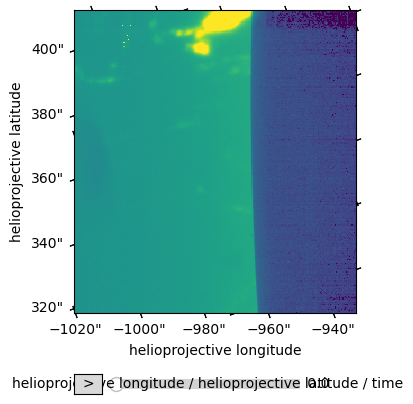

In [18]:
fig = plt.figure()
vmin, vmax = np.nanpercentile(ci[0].data, [1,99])
norm = PowerNorm(0.3, vmin=vmin, vmax=vmax)
ax = ci[:50].plot(norm=norm)

In [12]:
ani = ax.get_animation()

In [13]:
ani.save("animation.mp4")

2025-08-14 09:28:41 - matplotlib.animation - INFO: Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
2025-08-14 09:28:41 - matplotlib.animation - INFO: MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -framerate 5.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y animation.mp4
/home/stuart/.micromamba/envs/dkist-workshop/lib/python3.13/site-packages/dask/array/core.py:1723: FutureWarning: Can't acquire a memory view of a Dask array. This will raise in the future.
  warnings.warn(
/home/stuart/.micromamba/envs/dkist-workshop/lib/python3.13/site-packages/dask/array/core.py:1723: FutureWarning: Can't acquire a memory view of a Dask array. This will raise in the future.
  warnings.warn(
/home/stuart/.micromamba/envs/dkist-workshop/lib/python3.13/site-packages/dask/array/core.py:1723: FutureWarning: Can't acquire a memory view of a Dask array. This will raise in the future.
  warnings.warn(
/home/stuart/.micromamba/envs

In [19]:
from IPython.display import Video

Video("animation.mp4", embed=True)